# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import calendar

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [290]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [291]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [292]:
latitude_threshold = -10.5
numeric_variables = ['QTDFILMORT', 'QTDPARTNOR']
above_threshold_group = sinasc_raw[sinasc_raw['munResLat'] >= latitude_threshold]
below_threshold_group = sinasc_raw[sinasc_raw['munResLat'] < latitude_threshold]
above_summary_statistics = above_threshold_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
below_summary_statistics = below_threshold_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
print("\nAcima -10.5:")
print(above_summary_statistics)
print("\nAbaixo -10.5:")
print(below_summary_statistics)


Acima -10.5:
         QTDFILMORT   QTDPARTNOR
sum     3538.000000  8771.000000
mean       0.291770     0.711759
min        0.000000     0.000000
max        9.000000    40.000000
median     0.000000     0.000000
std        0.627856     1.279042
var        0.394204     1.635949

Abaixo -10.5:
         QTDFILMORT   QTDPARTNOR
sum     3105.000000  5800.000000
mean       0.242521     0.452242
min        0.000000     0.000000
max       28.000000    41.000000
median     0.000000     0.000000
std        0.599430     1.123426
var        0.359317     1.262087


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [293]:
ar_threshold = 3000 
numeric_variables = ['QTDGESTANT', 'IDADEPAI']
above_ar_group = sinasc_raw[sinasc_raw['munResArea'] >= ar_threshold]
below_ar_group = sinasc_raw[sinasc_raw['munResArea'] < ar_threshold]
above_ar_summary = above_ar_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
below_ar_summary = below_ar_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
print("\nAcima 3000:")
print(above_ar_summary)
print("\nAbaixo 3000:")
print(below_ar_summary)


Acima 3000:
          QTDGESTANT       IDADEPAI
sum     27046.000000  158424.000000
mean        1.310368      31.094014
min         0.000000      15.000000
max        52.000000      86.000000
median      1.000000      30.000000
std         1.447429       7.818364
var         2.095052      61.126809

Abaixo 3000:
         QTDGESTANT      IDADEPAI
sum     5870.000000  78074.000000
mean       1.134300     31.092792
min        0.000000     16.000000
max        9.000000     69.000000
median     1.000000     30.000000
std        1.208914      7.675474
var        1.461473     58.912900


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [294]:
num_bins = 5
numeric_variables = ['QTDPARTCES', 'PESO']
alt_summary_statistics = (
    sinasc_raw.assign(alt_bins=pd.cut(sinasc_raw['munResAlt'], bins=num_bins, precision=0))
    .groupby('alt_bins', observed=False)[numeric_variables]
    .agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']))
print("\nAgrupamento munResAlt:")
print(alt_summary_statistics)


Agrupamento munResAlt:
               QTDPARTCES                                                  \
                      sum      mean  min   max median       std       var   
alt_bins                                                                    
(84.0, 187.0]      9007.0  0.488078  0.0  12.0    0.0  0.741756  0.550202   
(187.0, 289.0]     2682.0  0.628103  0.0   5.0    0.0  0.749706  0.562058   
(289.0, 391.0]      307.0  0.546263  0.0   4.0    0.0  0.763818  0.583417   
(391.0, 493.0]      202.0  0.553425  0.0   3.0    0.0  0.737921  0.544528   
(493.0, 595.0]      938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746   

                    PESO                                              \
                     sum         mean  min   max  median         std   
alt_bins                                                               
(84.0, 187.0]   65481244  3250.818845  292  5480  3280.0  546.449052   
(187.0, 289.0]  13979470  3211.456467  285  5985  3245.0  532.614364   

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

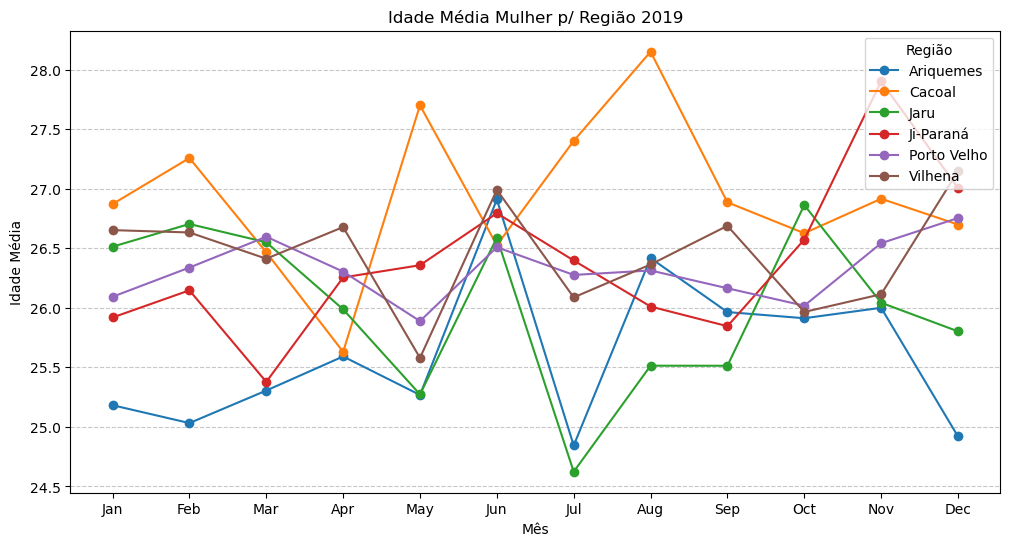

In [295]:
sinasc = pd.read_csv('SINASC_RO_2019.csv', parse_dates=['DTNASC'])
municipios_interesse = ['Porto Velho', 'Ariquemes', 'Jaru', 'Ji-Paraná', 'Cacoal', 'Vilhena']
average_age_per_month_region = sinasc[sinasc['munResNome'].isin(municipios_interesse)].groupby(['munResNome', sinasc['DTNASC'].dt.month])['IDADEMAE'].mean().unstack(level=0)
average_age_per_month_region.plot(figsize=(12, 6), marker='o')
plt.title('Idade Média Mulher p/ Região 2019')
plt.xlabel('Mês')
plt.ylabel('Idade Média')
plt.xticks(range(1, 13), labels=[calendar.month_abbr[month] for month in average_age_per_month_region.index], rotation=0)
plt.legend(title='Região', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [296]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
dados_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [297]:
dados_ro.columns

Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')

In [298]:
dados_ro.dtypes

municipio     object
regiao        object
idh          float64
ifdm         float64
pib            int64
dtype: object

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [299]:
dados_ro['faixa_idh'] = pd.cut(dados_ro['idh'], bins=[0, 0.6, 0.7, 0.8], labels=['Baixo', 'Médio', 'Alto'])
grouped_idh = dados_ro.groupby('faixa_idh', observed=False).agg({'idh': 'mean', 'municipio': 'count'})
print("IDH")
print(grouped_idh)

IDH
                idh  municipio
faixa_idh                     
Baixo      0.591333          9
Médio      0.644784         37
Alto       0.718500          6


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [300]:
dados_ro['faixa_ifdm'] = pd.cut(dados_ro['ifdm'], bins=[0, 0.5, 0.7, 1.0], labels=['Baixo', 'Médio', 'Alto'])
grouped_ifdm = dados_ro.groupby('faixa_ifdm', observed=False).agg({'ifdm': 'mean', 'municipio': 'count'})
print("\nIFDM")
print(grouped_ifdm)


IFDM
                ifdm  municipio
faixa_ifdm                     
Baixo       0.456200          1
Médio       0.594649         45
Alto        0.734650          6


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [301]:
dados_ro['faixa_pib'] = pd.cut(dados_ro['pib'], bins=[0, 1000000, 10000000, 100000000], labels=['Baixo', 'Médio', 'Alto'])
grouped_pib = dados_ro.groupby('faixa_pib', observed=False).agg({'pib': 'mean', 'municipio': 'count'})
print("\nPIB")
print(grouped_pib)


PIB
                    pib  municipio
faixa_pib                         
Baixo      2.822857e+05         44
Médio      2.200832e+06          7
Alto       1.791207e+07          1


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Municípios acima de -10.5 de latitude têm uma média ligeiramente maior de filhos mortos e partos normais e o oposto também é verdade.

- Municípios com área acima de 3000 têm significantemente mais entradas de gestantes.

- Nota-se que a maioria dos municípios está na faixa média para IDH e IFDM, enquanto o PIB não acompanha a tendencia.